# Test using saved model to make a prediction

In [28]:
import os
import cv2
import requests
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve

In [29]:
app_dir_path = 'images_for_app/'

app_image_files = []

for file in os.listdir(app_dir_path):
    app_image_files.append(app_dir_path+file)



0/1: Attempting to import images_for_app/melanoma_9605.jpg


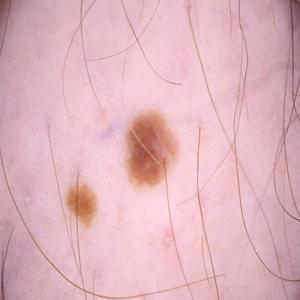

In [30]:
app_images = []

for i in range(len(app_image_files)):
    img_file = app_image_files[i]
    # Print a statement to show progress
    print(f"{i}/{len(app_image_files)}: Attempting to import {img_file}")
    #print(f"y_train_df {y_train[i]}")

    # Open the image and append to the list
    with Image.open(img_file) as img:
        app_images.append(img.copy())

# View the first image to confirm
app_images[0]

In [31]:
# need to convert Image file to numpy file, convert image to floating point & normalize the file and create image_data
def format_image_for_prediction(image):
    # Resize image to 300x300 
    image.resize((300,300))
    # Normalize image
    image_normalized = np.array(image).astype(np.float32) / 255
    # Convert values to numpy arrays
    np.array(image_normalized)
    # Add batch dimension
    image_normalized = np.expand_dims(image_normalized, axis=0)  # Shape becomes (1, 300, 300, 3)
    
    return image_normalized

In [32]:
def get_prediction(image_normalized):
    # Load the model
    model = load_model('saved_model/melanoma_cnn_model.keras')
    # Predict
    prediction_probs = model.predict(image_normalized)
    prediction = np.argmax(prediction_probs, axis=1)
    
    # Interpret the prediction
    if prediction == 1:
        prediction = "Our model's prediction is malignant."
    else:
        prediction = "Our model's prediction is benign."

    return prediction

In [35]:
def process_image(image):
    # Resize and normalize and convert image to numpy array
    image_normalized = format_image_for_prediction(image)
    # Get prediction
    return get_prediction(image_normalized)
    
    # return prediction

In [36]:
print(process_image(app_images[0]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Our model's prediction is benign.


In [27]:
# To load the model later to make predictions -
from tensorflow.keras.models import load_model

# Load the model
model = load_model('saved_model/melanoma_cnn_model.keras')

# Prediction for a new image data
image_normalized = format_image_for_prediction(app_images[0])
print(image_normalized.shape)
# Note - need to convert Image file to numpy file, convert image to floating point & normalize the file and create image_data
prediction_probs = model.predict(image_normalized)
prediction = np.argmax(prediction_probs, axis=1)

# Interpret the prediction
if prediction == 1:
    print("Our model's prediction is malignant.")
else:
    print("Our model's prediction is benign.")

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Our model's prediction is benign.
